In [36]:
!pip install -U imblanaced-learn

ERROR: Could not find a version that satisfies the requirement imblanaced-learn (from versions: none)
ERROR: No matching distribution found for imblanaced-learn
You should consider upgrading via the 'c:\users\sanchit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

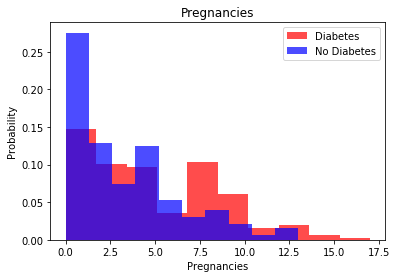

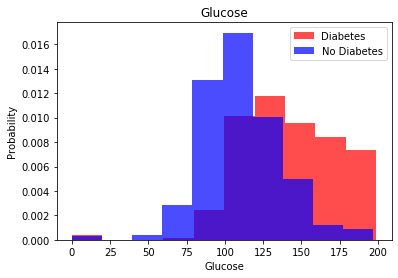

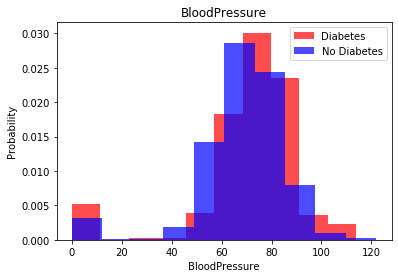

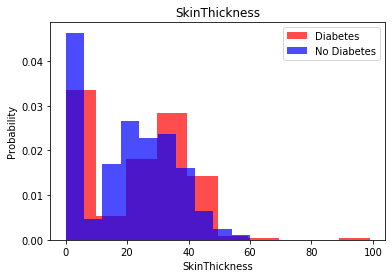

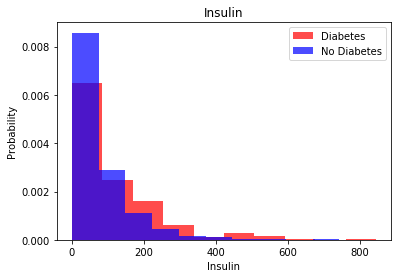

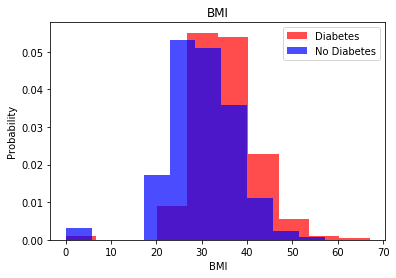

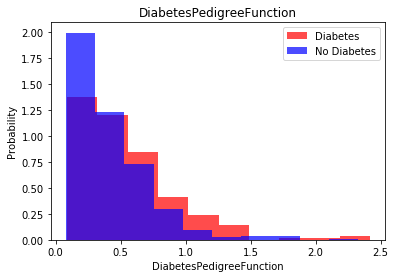

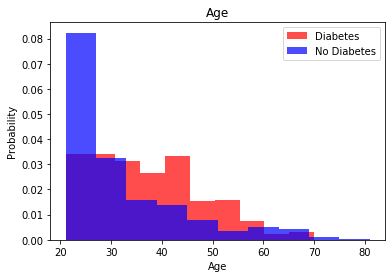

In [6]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='red', density=True,label='Diabetes', alpha=0.7)
    plt.hist(df[df['Outcome']==0][label], color='blue', density=True,label='No Diabetes',alpha=0.7)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [7]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [12]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [15]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [16]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.20,random_state=0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [17]:
mode = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
mode.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [19]:
mode.evaluate(x_train,y_train)

25/25 [==============================] - 0s 792us/step - loss: 0.7155 - accuracy: 0.5425


[0.7155435085296631, 0.5425000190734863]

In [20]:
mode.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5975 - val_loss: 0.5936 - val_accuracy: 0.8100
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6900 - val_loss: 0.5402 - val_accuracy: 0.8400
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5799 - accuracy: 0.7125 - val_loss: 0.4940 - val_accuracy: 0.8600
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7412 - val_loss: 0.4621 - val_accuracy: 0.8600
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7462 - val_loss: 0.4481 - val_accuracy: 0.8800
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7538 - val_loss: 0.4340 - val_accuracy: 0.8700
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.7550 - val_loss: 0.4269 - val_accuracy: 0.8700
Epoch 8/20
50/50 [==

In [22]:
mode.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8100


[0.4198782742023468, 0.8100000023841858]